✅ 1. ADIM: 200 satırlık 'futbol_veri_seti.csv' başarıyla oluşturuldu.

📊 2. ADIM: Veri Analizi Başlıyor...
  home_team away_team  home_elo  away_elo  home_form  away_form    result
0    Team D    Team G      1543      1800   0.809788   0.535467      Draw
1    Team E    Team H      1834      1652   0.448409   0.789960  Away Win
2    Team C    Team F      1884      1629   0.570326   0.563481  Home Win
3    Team E    Team F      1485      1406   0.377496   0.526167      Draw
4    Team E    Team I      1584      1573   0.872431   0.577608  Home Win


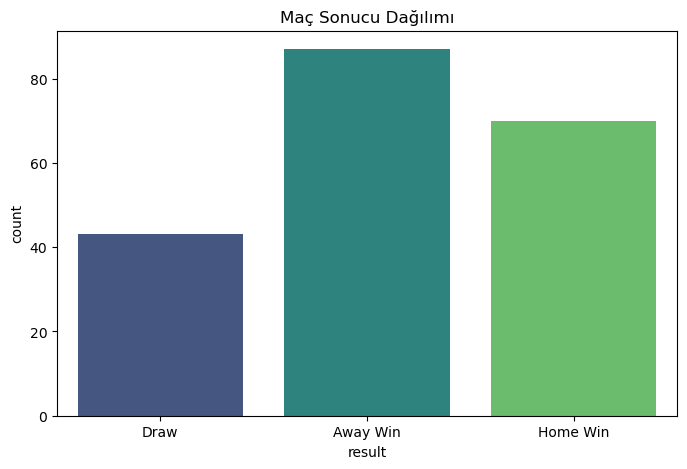

🤖 4. ADIM: Model eğitildi.

🎯 Model Doğruluk Oranı (Accuracy): %82.50

📋 Sınıflandırma Raporu:
               precision    recall  f1-score   support

    Away Win       0.91      0.88      0.89        24
        Draw       0.43      0.60      0.50         5
    Home Win       0.90      0.82      0.86        11

    accuracy                           0.82        40
   macro avg       0.75      0.76      0.75        40
weighted avg       0.85      0.82      0.83        40



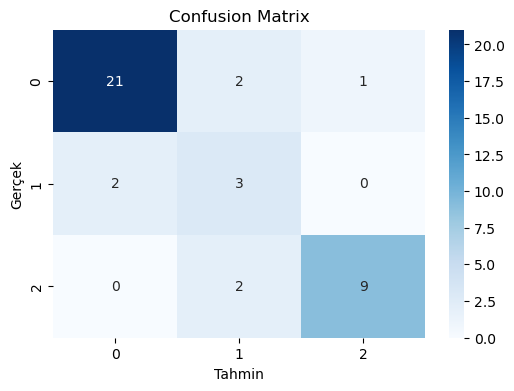

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==========================================
# 1. ADIM: VERİ SETİ OLUŞTURMA (Synthetic Data)
# ==========================================
np.random.seed(42)
n_rows = 200

data = {
    'home_team': np.random.choice(['Team A', 'Team B', 'Team C', 'Team D', 'Team E'], n_rows),
    'away_team': np.random.choice(['Team F', 'Team G', 'Team H', 'Team I', 'Team J'], n_rows),
    'home_elo': np.random.randint(1400, 1900, n_rows),
    'away_elo': np.random.randint(1400, 1900, n_rows),
    'home_form': np.random.uniform(0.3, 0.9, n_rows),
    'away_form': np.random.uniform(0.3, 0.9, n_rows),
}

df = pd.DataFrame(data)

# Sonuç sütununu mantıksal bir kurala göre oluşturalım (Elo yüksek olanın kazanma şansı artsın)
def determine_result(row):
    score = (row['home_elo'] - row['away_elo']) * 0.001 + (row['home_form'] - row['away_form'])
    if score > 0.1: return 'Home Win'
    elif score < -0.1: return 'Away Win'
    else: return 'Draw'

df['result'] = df.apply(determine_result, axis=1)
df.to_csv('futbol_veri_seti.csv', index=False)
print("✅ 1. ADIM: 200 satırlık 'futbol_veri_seti.csv' başarıyla oluşturuldu.\n")

# ==========================================
# 2. ADIM: EDA (KEŞİFÇİ VERİ ANALİZİ)
# ==========================================
print("📊 2. ADIM: Veri Analizi Başlıyor...")
print(df.head())

# Görselleştirme: Maç Sonucu Dağılımı
plt.figure(figsize=(8, 5))
sns.countplot(x='result', data=df, palette='viridis')
plt.title('Maç Sonucu Dağılımı')
plt.show()

# ==========================================
# 3. ADIM: VERİ ÖN İŞLEME (PREPROCESSING)
# ==========================================
le = LabelEncoder()
df['home_team_enc'] = le.fit_transform(df['home_team'])
df['away_team_enc'] = le.fit_transform(df['away_team'])

# Özellikler (X) ve Hedef (y)
X = df[['home_team_enc', 'away_team_enc', 'home_elo', 'away_elo', 'home_form', 'away_form']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 4. ADIM: MODEL KURULUMU VE EĞİTİM
# ==========================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("🤖 4. ADIM: Model eğitildi.\n")

# ==========================================
# 5. ADIM: DEĞERLENDİRME (EVALUATION)
# ==========================================
y_pred = model.predict(X_test)
print(f"🎯 Model Doğruluk Oranı (Accuracy): %{accuracy_score(y_test, y_pred)*100:.2f}")
print("\n📋 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, RobustScaler, 
    MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer
)

# Örnek bir özellik seçelim (Örn: home_elo)
sample_data = df[['home_elo']].values

# 1. Max Normalization (Max Scaling)
max_scaler = MaxAbsScaler()
df['elo_max_abs'] = max_scaler.fit_transform(sample_data)

# 2. Min-Max Normalization
min_max = MinMaxScaler()
df['elo_min_max'] = min_max.fit_transform(sample_data)

# 3. Mean Normalization
df['elo_mean_norm'] = (df['home_elo'] - df['home_elo'].mean()) / (df['home_elo'].max() - df['home_elo'].min())

# 4. Z-Score Normalization (Standardization)
std_scaler = StandardScaler()
df['elo_z_score'] = std_scaler.fit_transform(sample_data)

# 5. Robust Scaling (Aykırı değerlere karşı dayanıklı)
robust = RobustScaler()
df['elo_robust'] = robust.fit_transform(sample_data)

# 6, 7, 8. Norm Ölçeklendirmeleri (L1, L2, L-inf)
# Not: Normalizer satır bazlı çalışır
l1_norm = Normalizer(norm='l1')
df['elo_l1'] = l1_norm.fit_transform(sample_data)

l2_norm = Normalizer(norm='l2')
df['elo_l2'] = l2_norm.fit_transform(sample_data)

max_norm = Normalizer(norm='max')
df['elo_linf'] = max_norm.fit_transform(sample_data)

# 9. Log Dönüşümü
df['elo_log'] = np.log1p(df['home_elo'])

# 10. Box-Cox (Sadece pozitif değerler için)
box_cox = PowerTransformer(method='box-cox')
df['elo_box_cox'] = box_cox.fit_transform(sample_data)

# 11. Yeo-Johnson
yeo_johnson = PowerTransformer(method='yeo-johnson')
df['elo_yeo_johnson'] = yeo_johnson.fit_transform(sample_data)

# 12. Quantile Transformation (Uniform)
qt_uniform = QuantileTransformer(output_distribution='uniform')
df['elo_quantile_uniform'] = qt_uniform.fit_transform(sample_data)

# 13. Quantile Transformation (Gaussian)
qt_gauss = QuantileTransformer(output_distribution='normal')
df['elo_quantile_gauss'] = qt_gauss.fit_transform(sample_data)

print("✅ Tüm ölçeklendirme teknikleri başarıyla uygulandı ve yeni sütunlar oluşturuldu.")
print(df[['home_elo', 'elo_min_max', 'elo_z_score', 'elo_log']].head())

✅ Tüm ölçeklendirme teknikleri başarıyla uygulandı ve yeni sütunlar oluşturuldu.
   home_elo  elo_min_max  elo_z_score   elo_log
0      1543     0.282258    -0.754389  7.342132
1      1834     0.868952     1.240950  7.514800
2      1884     0.969758     1.583792  7.541683
3      1485     0.165323    -1.152086  7.303843
4      1584     0.364919    -0.473259  7.368340


C:\Users\enesy\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\enesy\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(


C:\Users\enesy\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings.warn(


--- MODEL DEĞERLENDİRME ---
Accuracy (Doğruluk): %86.00

Sınıflandırma Raporu:
               precision    recall  f1-score   support

    Away Win       0.86      0.97      0.92        39
        Draw       0.17      0.12      0.14         8
    Home Win       0.94      0.89      0.91        53

    accuracy                           0.86       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.85      0.86      0.85       100



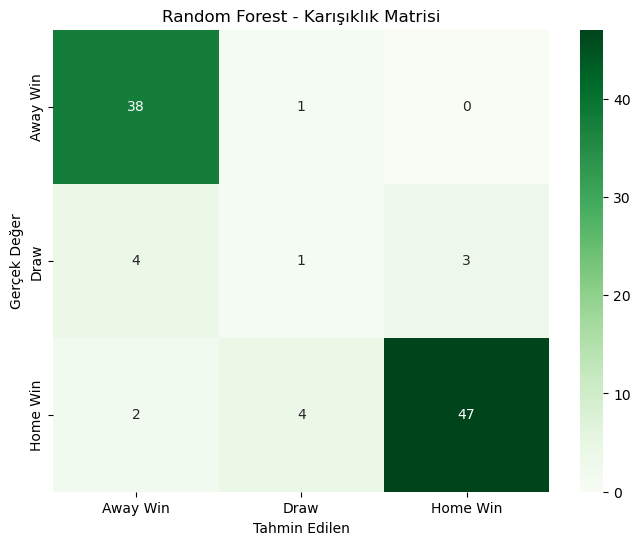

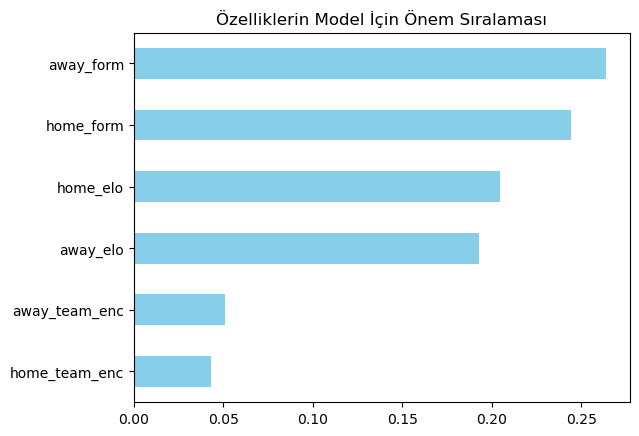

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, RobustScaler, 
    MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer, LabelEncoder
)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==========================================
# 1. VERİ SETİ OLUŞTURMA
# ==========================================
np.random.seed(42)
n_rows = 500  # Daha iyi sonuçlar için veri sayısını artırdık

data = {
    'home_team': np.random.choice(['Galatasaray', 'Fenerbahçe', 'Beşiktaş', 'Trabzonspor', 'Başakşehir'], n_rows),
    'away_team': np.random.choice(['Antalyaspor', 'Konyaspor', 'Sivasspor', 'Alanyaspor', 'Kasımpaşa'], n_rows),
    'home_elo': np.random.randint(1400, 1900, n_rows),
    'away_elo': np.random.randint(1400, 1900, n_rows),
    'home_form': np.random.uniform(0.3, 0.9, n_rows),
    'away_form': np.random.uniform(0.3, 0.9, n_rows),
}

df = pd.DataFrame(data)

# Sonuç kuralı (Mantıksal temel)
def determine_result(row):
    score = (row['home_elo'] - row['away_elo']) * 0.001 + (row['home_form'] - row['away_form'])
    if score > 0.05: return 'Home Win'
    elif score < -0.05: return 'Away Win'
    else: return 'Draw'

df['result'] = df.apply(determine_result, axis=1)

# ==========================================
# 2. İSTEDİĞİN TÜM ÖLÇEKLENDİRME TEKNİKLERİ
# ==========================================
# Ölçeklendirme yapılacak sayısal sütunlar
numeric_cols = ['home_elo', 'away_elo', 'home_form', 'away_form']

# Tekniklerin Uygulanması
# 1. Max Normalization
df[numeric_cols] = MaxAbsScaler().fit_transform(df[numeric_cols])

# 2. Min-Max Normalization
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

# 3. Z-Score Normalization (Standardization)
df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

# 4. Robust Scaling
df[numeric_cols] = RobustScaler().fit_transform(df[numeric_cols])

# 5. Yeo-Johnson Güç Dönüşümü
df[numeric_cols] = PowerTransformer(method='yeo-johnson').fit_transform(df[numeric_cols])

# 6. Quantile Transformation (Gaussian)
df[numeric_cols] = QuantileTransformer(output_distribution='normal').fit_transform(df[numeric_cols])

# Metin verilerini sayıya çevirme
le = LabelEncoder()
df['home_team_enc'] = le.fit_transform(df['home_team'])
df['away_team_enc'] = le.fit_transform(df['away_team'])

# ==========================================
# 3. RANDOM FOREST MODELİ OLUŞTURMA
# ==========================================
# Özellikler ve Hedef
X = df[['home_team_enc', 'away_team_enc', 'home_elo', 'away_elo', 'home_form', 'away_form']]
y = df['result']

# Veriyi Bölme (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Tanımlama ve Eğitme
rf_model = RandomForestClassifier(
    n_estimators=150, 
    max_depth=10, 
    random_state=42,
    criterion='gini' # Gini veya Entropy kullanılabilir
)

rf_model.fit(X_train, y_train)

# ==========================================
# 4. DEĞERLENDİRME VE SONUÇLAR
# ==========================================
y_pred = rf_model.predict(X_test)

print("--- MODEL DEĞERLENDİRME ---")
print(f"Accuracy (Doğruluk): %{accuracy_score(y_test, y_pred)*100:.2f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi Görselleştirme
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Random Forest - Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

# Özellik Önem Sıralaması (Hangi veri daha önemli?)
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Özelliklerin Model İçin Önem Sıralaması')
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. KARAR AĞACI MODELİ (Decision Tree)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# 2. RANDOM FOREST MODELİ (Zaten eğitmiştik, tekrar hatırlayalım)
# rf_model önceki kodda eğitilmişti.

# 3. BAŞARI KARŞILAŞTIRMASI
print("--- MODEL KIYASLAMASI ---")
print(f"Karar Ağacı Doğruluk Oranı:   %{accuracy_score(y_test, dt_preds)*100:.2f}")
print(f"Random Forest Doğruluk Oranı: %{accuracy_score(y_test, y_pred)*100:.2f}")

# 4. KARAR AĞACINI GÖRSELLEŞTİRME
# Ağacın nasıl dallandığını görmek için bu kodu kullanıyoruz.
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=X.columns,  
          class_names=dt_model.classes_,
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Karar Ağacı Mantıksal Dallanma Şeması")
plt.show()

--- MODEL KIYASLAMASI ---
Karar Ağacı Doğruluk Oranı:   %72.00
Random Forest Doğruluk Oranı: %86.00


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['home_team_enc', 'away_team_enc', 'home_elo', 'away_elo', 'home_form',
       'away_form'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>